
## Initial setup (code/data download)

In [1]:

%tensorflow_version 1
!wget https://github.com/lmcinnes/umap/archive/master.zip
!unzip -q master.zip
!rm master.zip
!cd umap-master

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.
--2021-09-20 20:34:36--  https://github.com/lmcinnes/umap/archive/master.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/lmcinnes/umap/zip/master [following]
--2021-09-20 20:34:36--  https://codeload.github.com/lmcinnes/umap/zip/master
Resolving codeload.github.com (codeload.github.com)... 140.82.113.9
Connecting to codeload.github.com (codeload.github.com)|140.82.113.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip’

master.zip              [         <=>        ]  39.12M  15.1MB/s    in 2.6s    

2021-09-20 20:34:39 (15.1 MB/s) - ‘master.zip’ saved [41020921]



In [2]:
%cd umap-master/
!ls

/content/umap-master
appveyor.yml	     doc		    Makefile	requirements.txt
azure-pipelines.yml  docs_requirements.txt  notebooks	setup.py
ci_scripts	     examples		    paper.bib	umap
CODE_OF_CONDUCT.md   images		    paper.md
CONTRIBUTING.md      LICENSE.txt	    README.rst


In [3]:
!pip3 install -r requirements.txt

     |████████████████████████████████| 1.1 MB 10.5 MB/s 
     |████████████████████████████████| 4.1 MB 36.8 MB/s 
  Created wheel for pynndescent: filename=pynndescent-0.5.4-py3-none-any.whl size=52373 sha256=dce98e806b5d2a2eb7665486af9b7c8e33ed79bda0ff60495dfe807860285ab0
  Stored in directory: /root/.cache/pip/wheels/d0/5b/62/3401692ddad12324249c774c4b15ccb046946021e2b581c043
Successfully built pynndescent


In [4]:
import umap

In [5]:
!git clone https://github.com/google-research/proteinfer 

%cd proteinfer

!pip3 install -qr  requirements.txt


Cloning into 'proteinfer'...
remote: Enumerating objects: 854, done.
remote: Counting objects: 100% (577/577), done.
remote: Compressing objects: 100% (419/419), done.
remote: Total 854 (delta 250), reused 366 (delta 139), pack-reused 277
Receiving objects: 100% (854/854), 102.40 MiB | 29.92 MiB/s, done.
Resolving deltas: 100% (389/389), done.
/content/umap-master/proteinfer
     |████████████████████████████████| 99 kB 6.0 MB/s 
     |████████████████████████████████| 2.3 MB 60.2 MB/s 
     |████████████████████████████████| 10.8 MB 15.5 MB/s 
     |████████████████████████████████| 2.8 MB 54.6 MB/s 
     |████████████████████████████████| 59 kB 9.0 MB/s 
     |████████████████████████████████| 89 kB 12.1 MB/s 
     |████████████████████████████████| 56 kB 6.7 MB/s 
     |████████████████████████████████| 17.3 MB 54 kB/s 
     |████████████████████████████████| 10.5 MB 28.2 MB/s 
     |████████████████████████████████| 107 kB 75.0 MB/s 
     |████████████████████████████████| 13.1 MB 

In [6]:

import pandas as pd
import tensorflow
import inference
import parenthood_lib
import baseline_utils,subprocess
import shlex
import tqdm 
import sklearn
import numpy as np
import utils
import colab_evaluation
import plotly.express as px


from plotnine import ggplot, geom_point, geom_point, geom_line, aes, stat_smooth, facet_wrap, xlim,coord_cartesian,theme_bw,labs,ggsave
tensorflow.test.is_gpu_available()

True

In [7]:
!wget https://github.com/lmcinnes/umap/archive/master.zip
!unzip -q master.zip
!rm master.zip
%cd umap-master
!ls
!pip3 install -r requirements.txt
import umap
%cd ..

--2021-09-20 20:36:39--  https://github.com/lmcinnes/umap/archive/master.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/lmcinnes/umap/zip/master [following]
--2021-09-20 20:36:39--  https://codeload.github.com/lmcinnes/umap/zip/master
Resolving codeload.github.com (codeload.github.com)... 140.82.114.10
Connecting to codeload.github.com (codeload.github.com)|140.82.114.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip’

master.zip              [         <=>        ]  39.12M  16.0MB/s    in 2.4s    

2021-09-20 20:36:42 (16.0 MB/s) - ‘master.zip’ saved [41020921]

/content/umap-master/proteinfer/umap-master
appveyor.yml	     doc		    Makefile	requirements.txt
azure-pipelines.yml  docs_requirements.txt  notebooks	setup.py
ci_scripts	     examples		

/content/umap-master/proteinfer


In [8]:

!wget -qN https://storage.googleapis.com/brain-genomics-public/research/proteins/proteinfer/models/zipped_models/noxpnd_cnn_swissprot_ec_random_swiss-cnn_for_swissprot_ec_random-13685140.tar.gz
!tar xzf noxpnd_cnn_swissprot_ec_random_swiss-cnn_for_swissprot_ec_random-13685140.tar.gz
!wget -qN https://storage.googleapis.com/brain-genomics-public/research/proteins/proteinfer/colab_support/parenthood.json.gz
!wget -qN https://storage.googleapis.com/brain-genomics-public/research/proteins/proteinfer/blast_baseline/fasta_files/SWISSPROT_RANDOM_EC/eval_test.fasta



In [9]:
!wget https://storage.googleapis.com/brain-genomics-public/research/proteins/proteinfer/datasets/swissprot/random/test-00001-of-00013.tfrecord
!wget https://storage.googleapis.com/brain-genomics-public/research/proteins/proteinfer/datasets/swissprot/random/test-00002-of-00013.tfrecord
!wget https://storage.googleapis.com/brain-genomics-public/research/proteins/proteinfer/datasets/swissprot/random/test-00003-of-00013.tfrecord
!wget https://storage.googleapis.com/brain-genomics-public/research/proteins/proteinfer/datasets/swissprot/random/test-00004-of-00013.tfrecord
!wget https://storage.googleapis.com/brain-genomics-public/research/proteins/proteinfer/datasets/swissprot/random/test-00005-of-00013.tfrecord
!wget https://storage.googleapis.com/brain-genomics-public/research/proteins/proteinfer/datasets/swissprot/random/test-00006-of-00013.tfrecord
!wget https://storage.googleapis.com/brain-genomics-public/research/proteins/proteinfer/datasets/swissprot/random/test-00007-of-00013.tfrecord
!wget https://storage.googleapis.com/brain-genomics-public/research/proteins/proteinfer/datasets/swissprot/random/test-00008-of-00013.tfrecord
!wget https://storage.googleapis.com/brain-genomics-public/research/proteins/proteinfer/datasets/swissprot/random/test-00009-of-00013.tfrecord
!wget https://storage.googleapis.com/brain-genomics-public/research/proteins/proteinfer/datasets/swissprot/random/test-00010-of-00013.tfrecord
!wget https://storage.googleapis.com/brain-genomics-public/research/proteins/proteinfer/datasets/swissprot/random/test-00011-of-00013.tfrecord
!wget https://storage.googleapis.com/brain-genomics-public/research/proteins/proteinfer/datasets/swissprot/random/test-00012-of-00013.tfrecord


--2021-09-20 20:36:54--  https://storage.googleapis.com/brain-genomics-public/research/proteins/proteinfer/datasets/swissprot/random/test-00001-of-00013.tfrecord
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.128, 142.251.2.128, 2607:f8b0:4023:c0b::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17162409 (16M) [application/octet-stream]
Saving to: ‘test-00001-of-00013.tfrecord’

test-00001-of-00013 100%[===================>]  16.37M  75.1MB/s    in 0.2s    

2021-09-20 20:36:55 (75.1 MB/s) - ‘test-00001-of-00013.tfrecord’ saved [17162409/17162409]

--2021-09-20 20:36:55--  https://storage.googleapis.com/brain-genomics-public/research/proteins/proteinfer/datasets/swissprot/random/test-00002-of-00013.tfrecord
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.128, 142.251.2.128, 74.125.137.128, ...
Connecting to storage.googleapis

##Read in the test dataset

In [10]:
import protein_dataset
import tqdm
import numpy as np
import pandas as pd
sequence_iterator = protein_dataset.yield_examples("./test*.tfrecord")
sequences = []
labels = []
ids = []
for example in tqdm.tqdm(sequence_iterator):
  ids.append(example[protein_dataset.SEQUENCE_ID_KEY])
  sequences.append(example[protein_dataset.SEQUENCE_KEY])
  labels.append(example[protein_dataset.LABEL_KEY])

# If we want to optimise for inference speed we should sort the dataset by
# sequence length:
seq_lengths = [len(x) for x in sequences]
indices = np.argsort(-np.array(seq_lengths)).tolist()

ids = [ids[indices[x]] for x in range(len(indices))]
sequences = [sequences[indices[x]] for x in range(len(indices))]
labels = [set(labels[indices[x]]) for x in range(len(indices))]

0it [00:00, ?it/s]

Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_one_shot_iterator(dataset)`.


36341it [00:13, 2643.47it/s]


## Load the saved model

In [11]:
inferrer = inference.Inferrer(
    'noxpnd_cnn_swissprot_ec_random_swiss-cnn_for_swissprot_ec_random-13685140',use_tqdm= True, batch_size=16,activation_type="pooled_representation"
)

label_vocab = inferrer.get_variable('label_vocab:0').astype(str)
label_normalizer = parenthood_lib.get_applicable_label_dict(
    'parenthood.json.gz')


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [12]:

kernel = inferrer.get_variable("logits/kernel/read:0")


## Perform inference

In [13]:
a=inferrer.get_activations(sequences)
df = pd.DataFrame(a)

Annotating batches of sequences: 100%|██████████| 2272/2272 [12:17<00:00,  3.08it/s]


In [14]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1060,1061,1062,1063,1064,1065,1066,1067,1068,1069,1070,1071,1072,1073,1074,1075,1076,1077,1078,1079,1080,1081,1082,1083,1084,1085,1086,1087,1088,1089,1090,1091,1092,1093,1094,1095,1096,1097,1098,1099
0,-0.502606,-0.656812,0.531399,-0.200026,-0.622383,1.485965,-0.477678,-1.232291,-0.126719,0.401007,0.522309,0.395762,-0.683745,0.642723,-1.602784,-0.718378,0.423946,-3.590276,-0.323888,0.361711,-0.218260,0.942010,-1.234401,-2.659501,-1.466147,-0.734438,-0.422387,-1.388905,-2.214800,-0.606682,-1.623638,-0.972472,-0.624552,-0.819128,1.022704,-2.297376,0.214626,0.414686,0.367293,-0.437199,...,-0.726675,0.704339,0.160865,-0.784328,-1.316351,-1.869528,-2.649980,-0.120459,-0.033512,-0.268373,-1.084579,1.044945,0.175420,-0.682422,0.488166,-1.341908,-0.006935,-0.729430,-1.481440,-0.207468,-0.529889,-1.664557,0.059468,0.589003,-1.199136,-0.731966,-0.568379,-0.677636,-2.110713,-0.083653,-0.738844,0.533033,-1.376311,-1.825938,0.922568,-1.359188,-0.953455,-0.775725,-0.995626,-0.892861
1,-0.518393,-0.638065,0.481470,-0.228233,-0.578859,1.491794,-0.466345,-1.231761,-0.132180,0.338277,0.520740,0.459688,-0.659561,0.614553,-1.646984,-0.722832,0.435101,-3.641499,-0.361902,0.291833,-0.172584,0.998383,-1.249467,-2.713535,-1.492557,-0.792146,-0.419726,-1.409750,-2.251189,-0.593904,-1.590052,-0.981840,-0.616027,-0.837228,1.056218,-2.383637,0.232591,0.448794,0.375024,-0.457210,...,-0.724751,0.611540,0.163162,-0.794264,-1.344134,-1.900593,-2.703208,-0.076900,-0.061272,-0.260246,-1.083421,1.061392,0.213924,-0.675414,0.481167,-1.320811,-0.033605,-0.698765,-1.500461,-0.186398,-0.542767,-1.804032,0.019612,0.559124,-1.180369,-0.653720,-0.563549,-0.678751,-2.078974,-0.065899,-0.747771,0.561752,-1.422562,-1.842176,0.893810,-1.442883,-0.955409,-0.714520,-1.037862,-0.853183
2,-0.518393,-0.638065,0.481470,-0.228233,-0.578859,1.491794,-0.466345,-1.231761,-0.132180,0.338277,0.520740,0.459688,-0.659561,0.614553,-1.646984,-0.722832,0.435101,-3.641499,-0.361902,0.291833,-0.172584,0.998383,-1.249467,-2.713535,-1.492557,-0.792146,-0.419726,-1.409750,-2.251189,-0.593904,-1.590052,-0.981840,-0.616027,-0.837228,1.056218,-2.383637,0.232591,0.448794,0.375024,-0.457210,...,-0.724751,0.611540,0.163162,-0.794264,-1.344134,-1.900593,-2.703208,-0.076900,-0.061272,-0.260246,-1.083421,1.061392,0.213924,-0.675414,0.481167,-1.320811,-0.033605,-0.698765,-1.500461,-0.186398,-0.542767,-1.804032,0.019612,0.559124,-1.180369,-0.653720,-0.563549,-0.678751,-2.078974,-0.065899,-0.747771,0.561752,-1.422562,-1.842176,0.893810,-1.442883,-0.955409,-0.714520,-1.037862,-0.853183
3,-0.497833,-0.616177,0.486445,-0.234750,-0.581222,1.510679,-0.489495,-1.219846,-0.152576,0.351636,0.562281,0.386234,-0.658668,0.643296,-1.618336,-0.710824,0.456077,-3.629309,-0.317715,0.283955,-0.171703,0.946217,-1.258783,-2.631865,-1.465509,-0.762880,-0.450229,-1.385403,-2.273087,-0.572635,-1.576422,-0.952841,-0.599044,-0.780889,1.072008,-2.328263,0.243263,0.480726,0.364399,-0.454774,...,-0.745825,0.726363,0.188322,-0.770729,-1.317781,-1.887164,-2.665929,-0.077256,-0.036783,-0.243498,-1.075364,1.069182,0.175930,-0.687764,0.480063,-1.292383,0.003631,-0.694010,-1.486918,-0.164222,-0.533447,-1.729187,0.019052,0.553732,-1.153493,-0.688702,-0.525161,-0.689251,-2.068882,-0.045319,-0.767465,0.582759,-1.403952,-1.812143,0.880966,-1.422569,-0.967779,-0.699195,-0.990511,-0.869959
4,-0.405598,-1.313194,0.205521,-0.542136,-1.348124,0.248937,-1.782702,-1.918995,0.693968,-0.208607,0.640627,2.083403,-0.289273,0.225581,-0.967817,-0.579064,0.766839,-3.810285,-0.852739,0.603692,-0.581120,2.289903,-1.018256,-2.428960,-1.387910,-1.150084,-1.167091,-1.214868,-1.851211,-1.136592,-1.700594,-1.261820,-1.340288,0.001225,1.321523,-1.515028,0.168237,-1.075601,0.291076,-1.458527,...,-0.059801,-0.104784,-0.247596,-0.525640,-1.159774,-0.783818,-2.079202,0.482373,-1.019349,-0.194455,-1.077637,0.394799,1.494043,0.631391,1.030613,-1.739284,-0

In [15]:
%cd umap-master
import umap

/content/umap-master/proteinfer/umap-master


## Embedding

In [16]:
def filter_to_just_ec(the_input):
  return [x for x in the_input if x.startswith(b"EC:") and b"-" not in x]
ec_labels = [filter_to_just_ec(x) for x in labels]
to_include = [len(x) ==1 for x in ec_labels]
indices = [i for i,x in enumerate(to_include) if x]
labs = [ec_labels[x] for x in indices]



pcs = umap.UMAP(300, metric='cosine', min_dist=1).fit_transform(df)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.


In [17]:
split_ec=[x[0].decode().replace("EC:","").split(".") for x in labs]

In [18]:
color_palette = [
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]
colors = pd.Series(split_ec).apply(lambda x: color_palette[int(x[0])])

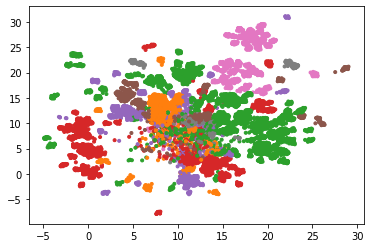

In [19]:
import matplotlib.pyplot as plt
plt.scatter(pcs[indices, 0], pcs[indices, 1], color=colors, marker='.')
plt.show()

In [20]:
def filter_to_just_ec(the_input):
  return [x for x in the_input if x.startswith(b"EC:") and b"-" not in x]
ec_labels = [filter_to_just_ec(x) for x in labels]

In [21]:
nonenzymes = [len(x)==0 for x in ec_labels]
non_enzyme_indices = [i for i,x in enumerate(nonenzymes) if x]

## EC model with GO terms

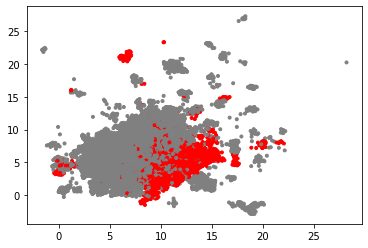

In [22]:
import matplotlib.pyplot as plt
is_membrane = np.array([b"GO:0031224" in x for x in labels])
plt.scatter(pcs[non_enzyme_indices, 0], pcs[non_enzyme_indices, 1], color=["red" if x else "gray" for x in is_membrane[non_enzyme_indices]], marker='.')
plt.show()

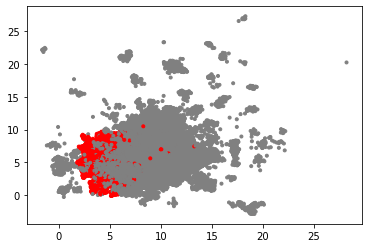

In [23]:
ribosome = np.array([b"GO:0003735" in x for x in labels])
plt.scatter(pcs[non_enzyme_indices, 0], pcs[non_enzyme_indices, 1], color=["red" if x else "gray" for x in ribosome[non_enzyme_indices]], marker='.')
plt.show()